In [1]:
# import trax
# from trax import layers as tl
# import trax.fastmath.numpy as fastnp
# from trax.supervised import training
from functools import partial
import numpy as np
from itertools import combinations
import random as rnd
from random import sample
import json
import sklearn.metrics as metrics
from sklearn.metrics import classification_report , confusion_matrix, roc_auc_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import copy
import torch
import os
import warnings
from scipy.spatial import distance
from os import walk
from transformers import AutoTokenizer, AutoModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#initialize codebert
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model_codebert = AutoModel.from_pretrained("microsoft/codebert-base").to(device)
np.random.seed(777)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from os import walk

from transformers import AutoModelForCausalLM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [4]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Calculate project counts and filter only those with more than 30 entries
project_counts = data['project'].value_counts()
filtered_projects = project_counts[project_counts > 30]

# Filter the data to include only the selected projects
filtered_data = data[data['project'].isin(filtered_projects.index)]

# Group by 'project' and 'category' to get counts of each category within each project
category_counts = filtered_data.groupby(['project', 'category']).size().unstack(fill_value=0)

# Create a DataFrame for project counts to ensure it has a compatible index for joining
project_counts_df = pd.DataFrame(filtered_projects)
project_counts_df.columns = ['project_count']

# Reset index to ensure 'project' is a column for a proper join
project_counts_df.reset_index(inplace=True)
category_counts.reset_index(inplace=True)

# Merge the dataframes on 'project'
result_df = pd.merge(project_counts_df, category_counts, on='project', how='left')

# Print the resulting DataFrame
print(result_df)


                   project  project_count   0   1   2    3    4   5
0                    dubbo            170   9  19  66    7   12  57
1                   hadoop            146   0  22  85   31    8   0
2                     nifi            139   0   0  28  111    0   0
3         junit-quickcheck            131   0   0   2    7  122   0
4             ormlite-core            113   0   0  90   23    0   0
5                  admiral            109   0   7   2   75    5  20
6                  wildfly             84   0   0  43   30    1  10
7                   Mapper             75   0   0  70    5    0   0
8                 fastjson             64   2   3  16   43    0   0
9     typescript-generator             60   0   0   0   60    0   0
10          Chronicle-Wire             59   0   0   2   57    0   0
11          Java-WebSocket             54  33  21   0    0    0   0
12                 biojava             51   0  28   0   23    0   0
13             spring-boot             48   0   

In [5]:
import pandas as pd

# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Get the count of unique values in the 'projects' column
unique_projects_counts = data['project'].value_counts()

# Filter and display the projects with more than 300 counts
filtered_projects = unique_projects_counts[unique_projects_counts > 30]
print(filtered_projects)


project
dubbo                     170
hadoop                    146
nifi                      139
junit-quickcheck          131
ormlite-core              113
admiral                   109
wildfly                    84
Mapper                     75
fastjson                   64
typescript-generator       60
Chronicle-Wire             59
Java-WebSocket             54
biojava                    51
spring-boot                48
visualee                   47
hbase                      47
innodb-java-reader         45
adyen-java-api-library     45
spring-hateoas             41
hive                       41
DataflowTemplates          39
esper                      38
spring-data-r2dbc          37
openhtmltopdf              35
nacos                      32
Name: count, dtype: int64


In [6]:
label_to_int_pre= {
    'OD': 0,
    'NIO': 1,
    'ID': 2,
    'NDOD': 3,
    'NOD': 4,
    'UD':5
}
int_to_label_pre = {
    0: 'OD',
    1: 'NIO',
    2: 'ID',
    3: 'NDOD',
    4: 'NOD',
    5: 'UD',
}

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame that includes all the data
# Load the dataset
file_path = "/home/riddhi/FlakyXbert/MAIN/data/IDoFT_data/IDoFT_dataset.csv"
data = pd.read_csv(file_path)

# Specify the project name you want to include
project_name = "ormlite-core"

# Assuming 'data' is your DataFrame that includes all the data
project_data = data[data['project'] == project_name]

# Extract the relevant fields: 'preprocessed_code' and 'category'
relevant_data = project_data[['preprocessed_code', 'category']]

# Filter the data to include only categories 1, 2, 3, and 4 (up to 5 if needed)
filtered_data = relevant_data[relevant_data['category'].isin([1, 2, 3, 4])]

# Split the data into training and validation sets, stratifying by 'category' to ensure all categories are represented
train_data, valid_data = train_test_split(filtered_data, test_size=0.2, random_state=42, stratify=filtered_data['category'])

# Mapping from integers to labels

# Replace category numbers with category labels
train_data['category'] = train_data['category'].map(int_to_label_pre)
valid_data['category'] = valid_data['category'].map(int_to_label_pre)

# Extract buggy code and categories for train and validation sets
train_buggy_code = train_data['preprocessed_code'].tolist()
valid_buggy_code = valid_data['preprocessed_code'].tolist()
train_categories = train_data['category'].tolist()
valid_categories = valid_data['category'].tolist()

# Print the splits for verification
print("Train buggy code:", len(train_buggy_code))
print("Validation buggy code:", len(valid_buggy_code))
print("Train categories:", len(train_categories))
print("Validation categories:", len(valid_categories))


Train buggy code: 90
Validation buggy code: 23
Train categories: 90
Validation categories: 23


In [8]:
print("Unique categories in training set:", set(train_categories))
print("Unique categories in validation set:", set(valid_categories))


Unique categories in training set: {'NDOD', 'ID'}
Unique categories in validation set: {'NDOD', 'ID'}


In [9]:
label_to_int= {
    'ID': 0,
    'NDOD': 1,
}

In [10]:
from torch.utils.data import Dataset
import numpy as np
import random
import torch

class SiameseDataset(Dataset):
    def __init__(self, train_buggy_code, valid_buggy_code, tokenizer, codebert, categories, split):
        self.train_buggy_code = train_buggy_code
        self.valid_buggy_code = valid_buggy_code
        self.tokenizer = tokenizer
        self.codebert = codebert.to(device)
        self.categories = categories
        self.split = split
        self.m_len = self.calculate_max_output_length()
        
        # Preprocess categories to map labels to indices
        self.label_to_indices = {}
        for index, category in enumerate(categories):
            if category not in self.label_to_indices:
                self.label_to_indices[category] = []
            self.label_to_indices[category].append(index)

        # For negative sampling
        self.labels = categories
        self.unique_labels = list(set(self.labels))
        
    def calculate_max_output_length(self):
        max_length = 0
        for code in self.train_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_train = length
        for code in self.valid_buggy_code:
            # Simulate processing of snippets to determine the concatenated output length
            length = self.simulate_process_length(code)
            if length > max_length:
                max_length_valid = length
        if max_length_train > max_length_valid:
            return max_length_train
        else:
            return max_length_valid

    def simulate_process_length(self, snippet):
        # Calculate how many segments would be needed
        encoded_input = self.tokenizer.encode(snippet, add_special_tokens=True)
        # Each segment processes up to 512 tokens (max length for BERT models)
        num_segments = (len(encoded_input) + 511) // 512  # 512 tokens per segment, including CLS and SEP
        return num_segments * 768
    def __len__(self):
        if self.split == 'train':
            return len(self.train_buggy_code)
        else:
            return len(self.valid_buggy_code)

    def __getitem__(self, idx):
        if self.split == 'train':
            # Anchor label
            anchor_label = self.categories[idx]

            # Positive sample
            positive_idx = idx
            while positive_idx == idx:  # Ensure different indices for anchor and positive
                positive_idx = random.choice(self.label_to_indices[anchor_label])

            # Negative sample
            negative_label = random.choice([lab for lab in self.unique_labels if lab != anchor_label])
            negative_idx = random.choice(self.label_to_indices[negative_label])

            anchor = self._process_snippet(self.train_buggy_code[idx])
            positive = self._process_snippet(self.train_buggy_code[positive_idx])
            negative = self._process_snippet(self.train_buggy_code[negative_idx])
            
            if len(anchor) <= 768:
                short_data = True
            else:
                short_data = False
                


            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'positive':torch.nn.functional.pad(positive, (0, self.m_len - positive.size(0))),
                'negative': torch.nn.functional.pad(negative, (0, self.m_len - negative.size(0))),
                'label': label_to_int[anchor_label],  # Optional, depends on how you want to use it
                'short_data_flag': short_data
            }
        elif self.split == 'val':
            anchor_label = self.categories[idx]
            anchor = self._process_snippet(self.valid_buggy_code[idx])
            
            return {
                'anchor': torch.nn.functional.pad(anchor, (0, self.m_len - anchor.size(0))),
                'label': label_to_int[anchor_label]  # Optional, depends on how you want to use it
            }

        
    def _process_snippet(self, snippet):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        # Tokenize input without the max_length constraint
        inputs = self.tokenizer(snippet, return_tensors='pt').to(device)

        if inputs['input_ids'].shape[1] < 512:
            with torch.no_grad():
                outs = self.codebert(**inputs)
            cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
            return cls  # Move to CPU to save GPU memory
        else:
            total_length = inputs['input_ids'].shape[1]
            parts = []
            step_size = 100
            chunk_size = 512

            for start_index in range(0, total_length, step_size):
                end_index = min(start_index + chunk_size, total_length)
                input_segment = {key: val[:, start_index:end_index].to(device) for key, val in inputs.items()}

                with torch.no_grad():
                    output_segment = self.codebert(**input_segment)
                cls_segment = output_segment.last_hidden_state[:, 0, :].squeeze().detach()
                parts.append(cls_segment)  # Move to CPU

            concatenated_parts = torch.cat(parts, dim=0)
            return concatenated_parts

In [11]:
# Create instances of the custom dataset class
train_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, train_categories, 'train')
val_dataset = SiameseDataset(train_buggy_code, valid_buggy_code, tokenizer, model_codebert, valid_categories, 'val')

# Create dataloaders for training and validation
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Print the lengths of the dataloaders for verification
print("Train dataloader length:", len(train_dataloader))
print("Validation dataloader length:", len(val_dataloader))

Train dataloader length: 12
Validation dataloader length: 3


In [12]:
import numpy as np

def sample_triplet_data(data, sample_size_ratio):
    """
    Samples a subset of triplet data (anchor, positive, negative) while preserving class distribution.
    
    Parameters:
    - data: list of dictionaries, where each dictionary has keys 'anchor', 'positive', 'negative', 'label'.
    - sample_size_ratio: float, the fraction of the data to sample (0 < sample_size_ratio <= 1).
    
    Returns:
    - sampled_data: list of dictionaries, the sampled subset of the original data.
    """
    # Extract labels to understand the class distribution
    labels = [item['label'] for item in data]
    unique_classes = np.unique(labels)
    
    sampled_data = []
    
    for cls in unique_classes:
        # Find all items belonging to the current class
        class_items = [item for item in data if item['label'] == cls]
        # Calculate the number of items to sample from this class
        num_samples = int(np.ceil(len(class_items) * sample_size_ratio))
        # Randomly sample items without replacement
        sampled_items = np.random.choice(class_items, size=num_samples, replace=False)
        # Append the sampled items to the output list
        sampled_data.extend(sampled_items)
    
    # Optionally, shuffle the sampled dataset to mix classes
    np.random.shuffle(sampled_data)

    return sampled_data


In [13]:
import gc
from tqdm import tqdm
plot_data = []
plot_labels = []
short_data_flags = []
for item in tqdm(train_dataset):
    
    plot_data.append(item['anchor'])
    plot_labels.append(item['label'])
    short_data_flags.append(item['short_data_flag'])

 16%|█▌        | 14/90 [00:00<00:02, 35.84it/s]

100%|██████████| 90/90 [00:02<00:00, 41.49it/s]


In [14]:
m_len = plot_data[0].shape[0]

In [15]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']  
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap
cc = LinearSegmentedColormap.from_list("cc", colors, N=5)


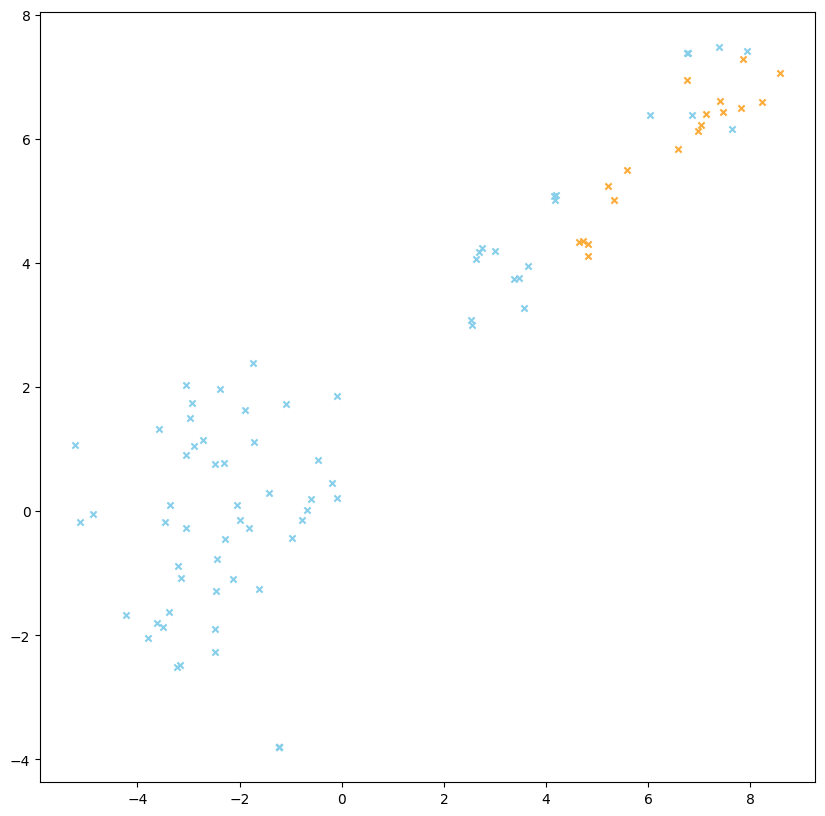

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
import numpy as np

# Assuming X, plot_data, and plot_labels are defined as before
# Also assuming bool_values is your list/array of boolean values

X = torch.stack(plot_data).cpu().numpy()

# Extract labels for each point
labelsNums = plot_labels

# Perform t-SNE dimensionality reduction
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

# Assuming 'cc' is a colormap, you might need to adjust this to fit your actual colormap variable
# Generate an array of colors for each label
unique_labels = np.unique(labelsNums)
colors = plt.cm.get_cmap(cc, len(unique_labels))  # Adjust 'cc' as needed to your colormap name
label_to_color = {label: colors(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
colors_array = np.array([label_to_color[label] for label in labelsNums])

# Create the scatter plot
plt.figure(figsize=(10, 10))

# Iterate through each datapoint
for i in range(len(X_embedded)):
    marker = 'x' if short_data_flags[i] else 'o'  # Choose the marker based on the boolean value
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors_array[i], s=20, alpha=1, marker=marker)

# Set the background color to black
# plt.gca().set_facecolor('white')
# # Adjust the color of the ticks and labels for better visibility
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# plt.xlabel('Component 1', color='white')
# plt.ylabel('Component 2', color='white')

plt.show()


In [17]:
# Load the CodeBERT tokenizer (adjust the model_name as needed)
model_name = "microsoft/codebert-base"
codebert_model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


class SiameseNetwork(nn.Module):
    def __init__(self, embedding_size):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(embedding_size, int(embedding_size/2)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/2), int(embedding_size/4)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embedding_size/4), embedding_size)
        )

    def forward(self, x):
        output = self.fc(x)
        return output

In [18]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = (anchor - positive).pow(2).sum(1)
        distance_negative = (anchor - negative).pow(2).sum(1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return losses.mean()

In [19]:
learning_rate = 1e-5
embed_size = m_len  # This should match the output size of CodeBERT
siamese_network = SiameseNetwork(embed_size).to(device)
criterion = TripletLoss(margin=1.0)
optimizer = optim.Adam(siamese_network.parameters(), lr=learning_rate)
triplet_loss = TripletLoss().to(device)

In [20]:
# from transformers import get_linear_schedule_with_warmup
# warmup_Frac = 0.1
# total_iter = num_epochs * len(train_dataloader)
# scheduler = get_linear_schedule_with_warmup(optimizer, int(warmup_Frac * total_iter), total_iter)

In [21]:
from tqdm import tqdm
best_loss = 100.0
num_epochs = 100
epoch_loss_list = []
model_name = "FlakyXbert_IDoFT_project_" + project_name + '_final.pth'
for epoch in range(num_epochs):
    total_loss = 0.0
    siamese_network.train()
    for batch in tqdm(train_dataloader):

        labels = (batch['label']).to(device)
        batch_anchor = (batch['anchor']).to(device)
        batch_positive = (batch['positive']).to(device)
        batch_negative = (batch['negative']).to(device)

        anchor_output = siamese_network(batch_anchor)
        positive_out = siamese_network(batch_positive)
        negative_out = siamese_network(batch_negative)

        loss = criterion(anchor_output, positive_out, negative_out)
        optimizer.zero_grad()
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(siamese_network.parameters(), max_norm=2.0)        
        optimizer.step()
        # scheduler.step()

        total_loss += loss.item()
        if total_loss <= best_loss:
            # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
            print("Loss improved saving model")
            torch.save(siamese_network.state_dict(), model_name)
            best_loss = total_loss
        
            
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    # The line `epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")` is attempting to append a formatted string to a list named `epoch_loss_list`. This string contains information about the current epoch number, total number of epochs, and the average loss calculated for that epoch. However, in the provided code snippet, the `epoch_loss_list` list is not defined or used anywhere else in the code.
    epoch_loss_list.append(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_dataloader)}")
    

  8%|▊         | 1/12 [00:00<00:02,  4.36it/s]

 17%|█▋        | 2/12 [00:00<00:01,  5.06it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  6.23it/s]


Epoch 1/100, Loss: 0.8362728108962377


  8%|▊         | 1/12 [00:00<00:01,  5.60it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  6.74it/s]


Epoch 2/100, Loss: 0.7636011640230814


  8%|▊         | 1/12 [00:00<00:01,  6.85it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  6.49it/s]


Epoch 3/100, Loss: 0.6545002708832423


100%|██████████| 12/12 [00:01<00:00,  6.52it/s]


Epoch 4/100, Loss: 0.6290912727514902


  8%|▊         | 1/12 [00:00<00:01,  5.89it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  6.10it/s]


Epoch 5/100, Loss: 0.6269374067584673


  8%|▊         | 1/12 [00:00<00:02,  5.17it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  6.37it/s]


Epoch 6/100, Loss: 0.5130611235896746


100%|██████████| 12/12 [00:01<00:00,  6.70it/s]


Epoch 7/100, Loss: 0.4518801396091779


 17%|█▋        | 2/12 [00:00<00:01,  5.01it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  6.20it/s]


Epoch 8/100, Loss: 0.5375998951494694


100%|██████████| 12/12 [00:01<00:00,  6.41it/s]


Epoch 9/100, Loss: 0.4954112308720748


100%|██████████| 12/12 [00:01<00:00,  8.11it/s]


Epoch 10/100, Loss: 0.4886893555521965


100%|██████████| 12/12 [00:01<00:00,  8.69it/s]


Epoch 11/100, Loss: 0.4657760486006737


100%|██████████| 12/12 [00:01<00:00,  8.03it/s]


Epoch 12/100, Loss: 0.5090200112511715


100%|██████████| 12/12 [00:01<00:00,  8.48it/s]


Epoch 13/100, Loss: 0.46664752314488095


100%|██████████| 12/12 [00:01<00:00,  8.80it/s]


Epoch 14/100, Loss: 0.43909943973024684


100%|██████████| 12/12 [00:01<00:00,  8.56it/s]


Epoch 15/100, Loss: 0.4466888339569171


100%|██████████| 12/12 [00:01<00:00,  8.77it/s]


Epoch 16/100, Loss: 0.38531887407104176


100%|██████████| 12/12 [00:01<00:00,  8.73it/s]


Epoch 17/100, Loss: 0.38350848853588104


100%|██████████| 12/12 [00:01<00:00,  8.68it/s]


Epoch 18/100, Loss: 0.4117674380540848


100%|██████████| 12/12 [00:01<00:00,  8.97it/s]


Epoch 19/100, Loss: 0.43810693609217805


100%|██████████| 12/12 [00:01<00:00,  8.93it/s]


Epoch 20/100, Loss: 0.38422725970546406


100%|██████████| 12/12 [00:01<00:00,  9.54it/s]


Epoch 21/100, Loss: 0.37277474254369736


100%|██████████| 12/12 [00:01<00:00,  8.53it/s]


Epoch 22/100, Loss: 0.34607358028491336


100%|██████████| 12/12 [00:01<00:00,  8.51it/s]


Epoch 23/100, Loss: 0.5191333840290705


100%|██████████| 12/12 [00:01<00:00,  9.87it/s]


Epoch 24/100, Loss: 0.33719646744430065


100%|██████████| 12/12 [00:01<00:00,  8.46it/s]


Epoch 25/100, Loss: 0.30827675697704154


100%|██████████| 12/12 [00:01<00:00,  9.00it/s]


Epoch 26/100, Loss: 0.2880942113697529


100%|██████████| 12/12 [00:01<00:00,  8.96it/s]


Epoch 27/100, Loss: 0.2975712399929762


100%|██████████| 12/12 [00:01<00:00,  8.41it/s]


Epoch 28/100, Loss: 0.29733778970936936


100%|██████████| 12/12 [00:01<00:00,  8.79it/s]


Epoch 29/100, Loss: 0.30947473148504895


100%|██████████| 12/12 [00:01<00:00,  8.21it/s]


Epoch 30/100, Loss: 0.34126786328852177


100%|██████████| 12/12 [00:01<00:00,  8.95it/s]


Epoch 31/100, Loss: 0.3105027178923289


100%|██████████| 12/12 [00:01<00:00,  9.08it/s]


Epoch 32/100, Loss: 0.34420643871029216


100%|██████████| 12/12 [00:01<00:00,  8.63it/s]


Epoch 33/100, Loss: 0.2798630551745494


100%|██████████| 12/12 [00:01<00:00,  9.14it/s]


Epoch 34/100, Loss: 0.27431446748475236


100%|██████████| 12/12 [00:01<00:00,  8.19it/s]


Epoch 35/100, Loss: 0.3028651426235835


100%|██████████| 12/12 [00:01<00:00,  8.79it/s]


Epoch 36/100, Loss: 0.2016623051216205


100%|██████████| 12/12 [00:01<00:00,  9.08it/s]


Epoch 37/100, Loss: 0.16993351404865584


100%|██████████| 12/12 [00:01<00:00,  8.38it/s]


Epoch 38/100, Loss: 0.20214268565177917


100%|██████████| 12/12 [00:01<00:00,  9.36it/s]


Epoch 39/100, Loss: 0.19847155486543974


100%|██████████| 12/12 [00:01<00:00,  8.97it/s]


Epoch 40/100, Loss: 0.22075407144924006


100%|██████████| 12/12 [00:01<00:00,  8.18it/s]


Epoch 41/100, Loss: 0.2648864996929963


100%|██████████| 12/12 [00:01<00:00,  9.37it/s]


Epoch 42/100, Loss: 0.18055326926211515


100%|██████████| 12/12 [00:01<00:00,  9.18it/s]


Epoch 43/100, Loss: 0.17723352586229643


100%|██████████| 12/12 [00:01<00:00,  8.69it/s]


Epoch 44/100, Loss: 0.14664102656145891


  0%|          | 0/12 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  9.54it/s]


Epoch 45/100, Loss: 0.17323170540233454


100%|██████████| 12/12 [00:01<00:00,  9.35it/s]


Epoch 46/100, Loss: 0.13402102949718633


100%|██████████| 12/12 [00:01<00:00,  8.37it/s]


Epoch 47/100, Loss: 0.12449218519032001


100%|██████████| 12/12 [00:01<00:00,  8.47it/s]


Epoch 48/100, Loss: 0.11712141521275043


100%|██████████| 12/12 [00:01<00:00,  8.90it/s]


Epoch 49/100, Loss: 0.14539321201543012


100%|██████████| 12/12 [00:01<00:00,  8.30it/s]


Epoch 50/100, Loss: 0.15920315558711687


100%|██████████| 12/12 [00:01<00:00,  8.35it/s]


Epoch 51/100, Loss: 0.12454073255260785


100%|██████████| 12/12 [00:01<00:00,  9.28it/s]


Epoch 52/100, Loss: 0.0977509884784619


  8%|▊         | 1/12 [00:00<00:01,  9.21it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  9.12it/s]


Epoch 53/100, Loss: 0.1225943894435962


100%|██████████| 12/12 [00:01<00:00,  8.58it/s]


Epoch 54/100, Loss: 0.11572466231882572


100%|██████████| 12/12 [00:01<00:00, 10.14it/s]


Epoch 55/100, Loss: 0.09104207778970401


 17%|█▋        | 2/12 [00:00<00:00, 10.69it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  9.00it/s]


Epoch 56/100, Loss: 0.09570542971293132


100%|██████████| 12/12 [00:01<00:00,  7.97it/s]


Epoch 57/100, Loss: 0.10873436120649178


  8%|▊         | 1/12 [00:00<00:01,  7.53it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.28it/s]


Epoch 58/100, Loss: 0.08725855313241482


  8%|▊         | 1/12 [00:00<00:01,  8.58it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.73it/s]


Epoch 59/100, Loss: 0.11426646262407303


100%|██████████| 12/12 [00:01<00:00,  8.38it/s]


Epoch 60/100, Loss: 0.09487003522614638


100%|██████████| 12/12 [00:01<00:00,  8.26it/s]


Epoch 61/100, Loss: 0.0791276569167773


100%|██████████| 12/12 [00:01<00:00,  7.84it/s]


Epoch 62/100, Loss: 0.12049968106051286


  8%|▊         | 1/12 [00:00<00:01,  9.45it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.37it/s]


Epoch 63/100, Loss: 0.07389656516412894


  8%|▊         | 1/12 [00:00<00:01,  6.57it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.85it/s]


Epoch 64/100, Loss: 0.04627850962181886


100%|██████████| 12/12 [00:01<00:00,  9.54it/s]


Epoch 65/100, Loss: 0.07189772029717763


100%|██████████| 12/12 [00:01<00:00,  8.77it/s]


Epoch 66/100, Loss: 0.08404689468443394


100%|██████████| 12/12 [00:01<00:00,  9.25it/s]


Epoch 67/100, Loss: 0.052363207563757896


100%|██████████| 12/12 [00:01<00:00,  8.56it/s]


Epoch 68/100, Loss: 0.04495376100142797


100%|██████████| 12/12 [00:01<00:00,  9.12it/s]


Epoch 69/100, Loss: 0.08239795391758283


  8%|▊         | 1/12 [00:00<00:01,  6.29it/s]

Loss improved saving model


 17%|█▋        | 2/12 [00:00<00:01,  7.54it/s]

Loss improved saving model


 25%|██▌       | 3/12 [00:00<00:01,  7.52it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.57it/s]


Epoch 70/100, Loss: 0.06397843795518081


  8%|▊         | 1/12 [00:00<00:01,  7.91it/s]

Loss improved saving model


 17%|█▋        | 2/12 [00:00<00:01,  7.14it/s]

Loss improved saving model


 25%|██▌       | 3/12 [00:00<00:01,  7.86it/s]

Loss improved saving model


 33%|███▎      | 4/12 [00:00<00:01,  7.22it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  7.98it/s]


Epoch 71/100, Loss: 0.0597065898279349


  8%|▊         | 1/12 [00:00<00:01,  7.91it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.25it/s]


Epoch 72/100, Loss: 0.06438882338503997


  8%|▊         | 1/12 [00:00<00:01,  6.48it/s]

Loss improved saving model


 17%|█▋        | 2/12 [00:00<00:01,  8.05it/s]

Loss improved saving model


 25%|██▌       | 3/12 [00:00<00:01,  8.68it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.48it/s]


Epoch 73/100, Loss: 0.06262761726975441


100%|██████████| 12/12 [00:01<00:00,  8.29it/s]


Epoch 74/100, Loss: 0.06798043722907703


100%|██████████| 12/12 [00:01<00:00,  9.29it/s]


Epoch 75/100, Loss: 0.041046748558680214


  8%|▊         | 1/12 [00:00<00:01,  6.35it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.44it/s]


Epoch 76/100, Loss: 0.0446038277198871


  8%|▊         | 1/12 [00:00<00:01,  8.59it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  9.13it/s]


Epoch 77/100, Loss: 0.056900606180230774


100%|██████████| 12/12 [00:01<00:00,  8.46it/s]


Epoch 78/100, Loss: 0.0296560600399971


100%|██████████| 12/12 [00:01<00:00,  8.68it/s]


Epoch 79/100, Loss: 0.0603335356960694


  8%|▊         | 1/12 [00:00<00:01,  8.65it/s]

Loss improved saving model


 17%|█▋        | 2/12 [00:00<00:01,  7.11it/s]

Loss improved saving model


 25%|██▌       | 3/12 [00:00<00:01,  7.91it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  7.92it/s]


Epoch 80/100, Loss: 0.04915745494266351


  8%|▊         | 1/12 [00:00<00:01,  6.97it/s]

Loss improved saving model


 17%|█▋        | 2/12 [00:00<00:01,  8.26it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.65it/s]


Epoch 81/100, Loss: 0.07214703783392906


  8%|▊         | 1/12 [00:00<00:01,  7.93it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.25it/s]


Epoch 82/100, Loss: 0.042400349552432694


100%|██████████| 12/12 [00:01<00:00,  7.84it/s]


Epoch 83/100, Loss: 0.045572699358065925


  8%|▊         | 1/12 [00:00<00:01,  7.26it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  9.13it/s]


Epoch 84/100, Loss: 0.045183353746930756


100%|██████████| 12/12 [00:01<00:00,  8.91it/s]


Epoch 85/100, Loss: 0.09307524003088474


  8%|▊         | 1/12 [00:00<00:01,  7.18it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.58it/s]


Epoch 86/100, Loss: 0.053600162267684937


  8%|▊         | 1/12 [00:00<00:01,  8.49it/s]

Loss improved saving model


 17%|█▋        | 2/12 [00:00<00:01,  7.10it/s]

Loss improved saving model


 25%|██▌       | 3/12 [00:00<00:01,  7.08it/s]

Loss improved saving model


 33%|███▎      | 4/12 [00:00<00:01,  7.23it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.60it/s]


Epoch 87/100, Loss: 0.048877947653333344


100%|██████████| 12/12 [00:01<00:00,  9.30it/s]


Epoch 88/100, Loss: 0.05574897676706314


  8%|▊         | 1/12 [00:00<00:01,  9.45it/s]

Loss improved saving model


 17%|█▋        | 2/12 [00:00<00:01,  9.07it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.23it/s]


Epoch 89/100, Loss: 0.03009142850836118


  8%|▊         | 1/12 [00:00<00:01,  7.48it/s]

Loss improved saving model


 17%|█▋        | 2/12 [00:00<00:01,  7.26it/s]

Loss improved saving model


 25%|██▌       | 3/12 [00:00<00:01,  7.43it/s]

Loss improved saving model


 33%|███▎      | 4/12 [00:00<00:01,  7.11it/s]

Loss improved saving model


 42%|████▏     | 5/12 [00:00<00:00,  7.41it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.74it/s]


Epoch 90/100, Loss: 0.004927394290765126


  8%|▊         | 1/12 [00:00<00:01,  6.70it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.58it/s]


Epoch 91/100, Loss: 0.04700851192077001


  8%|▊         | 1/12 [00:00<00:01,  8.70it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.82it/s]


Epoch 92/100, Loss: 0.042922792956233025


  8%|▊         | 1/12 [00:00<00:01,  9.96it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.64it/s]


Epoch 93/100, Loss: 0.040802812203764915


  8%|▊         | 1/12 [00:00<00:01,  9.18it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.88it/s]


Epoch 94/100, Loss: 0.028834009543061256


100%|██████████| 12/12 [00:01<00:00,  8.94it/s]


Epoch 95/100, Loss: 0.03327887443204721


  8%|▊         | 1/12 [00:00<00:01,  9.26it/s]

Loss improved saving model


 17%|█▋        | 2/12 [00:00<00:01,  7.61it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.51it/s]


Epoch 96/100, Loss: 0.018702053154508274


100%|██████████| 12/12 [00:01<00:00,  8.13it/s]


Epoch 97/100, Loss: 0.027341994767387707


100%|██████████| 12/12 [00:01<00:00,  9.10it/s]


Epoch 98/100, Loss: 0.04299248941242695


100%|██████████| 12/12 [00:01<00:00,  8.43it/s]


Epoch 99/100, Loss: 0.01682346500456333


  0%|          | 0/12 [00:00<?, ?it/s]

Loss improved saving model


100%|██████████| 12/12 [00:01<00:00,  8.95it/s]

Epoch 100/100, Loss: 0.025397616749008495


In [22]:
epoch_loss_list[-50:-20]

['Epoch 51/100, Loss: 0.12454073255260785',
 'Epoch 52/100, Loss: 0.0977509884784619',
 'Epoch 53/100, Loss: 0.1225943894435962',
 'Epoch 54/100, Loss: 0.11572466231882572',
 'Epoch 55/100, Loss: 0.09104207778970401',
 'Epoch 56/100, Loss: 0.09570542971293132',
 'Epoch 57/100, Loss: 0.10873436120649178',
 'Epoch 58/100, Loss: 0.08725855313241482',
 'Epoch 59/100, Loss: 0.11426646262407303',
 'Epoch 60/100, Loss: 0.09487003522614638',
 'Epoch 61/100, Loss: 0.0791276569167773',
 'Epoch 62/100, Loss: 0.12049968106051286',
 'Epoch 63/100, Loss: 0.07389656516412894',
 'Epoch 64/100, Loss: 0.04627850962181886',
 'Epoch 65/100, Loss: 0.07189772029717763',
 'Epoch 66/100, Loss: 0.08404689468443394',
 'Epoch 67/100, Loss: 0.052363207563757896',
 'Epoch 68/100, Loss: 0.04495376100142797',
 'Epoch 69/100, Loss: 0.08239795391758283',
 'Epoch 70/100, Loss: 0.06397843795518081',
 'Epoch 71/100, Loss: 0.0597065898279349',
 'Epoch 72/100, Loss: 0.06438882338503997',
 'Epoch 73/100, Loss: 0.06262761726

In [23]:
siamese_network.load_state_dict(torch.load(model_name))


<All keys matched successfully>

In [24]:
siamese_network.to(device).eval()
post_train_embed = []
post_train_label = []
with torch.no_grad():
    for item in tqdm(train_dataset):
        post_train_embed.append(siamese_network(item['anchor']))
        post_train_label.append(item['label'])

  0%|          | 0/90 [00:00<?, ?it/s]

100%|██████████| 90/90 [00:01<00:00, 65.12it/s]


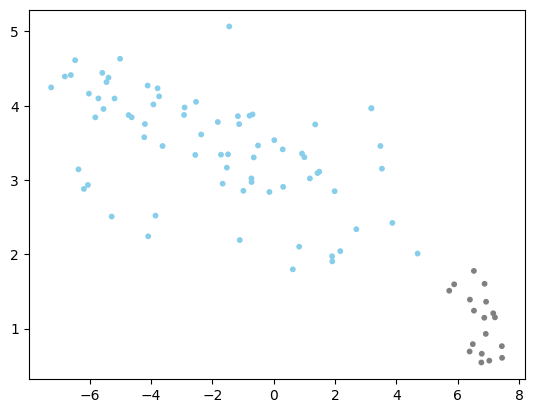

In [25]:
%matplotlib inline

X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label
X_embedded= TSNE(n_components=2, init='random').fit_transform(X_np)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1] , c=labelsNums[:len(X_embedded)], s=10, cmap= cc , alpha=1 )


In [26]:
def clsembed(snippet):
    inputs = tokenizer(snippet, padding='max_length', max_length=218, truncation=True, return_tensors='pt').to(device)
    #tokens = [self.tokenizer.cls_token] + inputs  + [self.tokenizer.sep_token]
    if(len(inputs)<512):
        with torch.no_grad():
            outs = model_codebert(**inputs)
        cls = outs.last_hidden_state[:, 0, :].squeeze().detach()
        return cls
    else:
        print('longtest')
        i = 0
        part_vector =  []
        while ( i < len(inputs)-200) :
            #tokens = [self.tokenizer.cls_token] + inputs[i:i+250] +[self.tokenizer.sep_token]
            #tokens_ids= self.tokenizer.convert_tokens_to_ids(tokens)
            input_seg = [tokenizer.cls_token] + inputs[i:i+250] +[tokenizer.sep_token]
            with torch.no_grad():
                ots = model_codebert(**input_seg)
            cls = ots.last_hidden_state[:, 0, :].squeeze().detach()
            #cls = model_codebert(torch.tensor(inputs)[None,:])[1]
            #vector = cls[0].detach().numpy()
            parts.append(cls)
            i = i+100
        return parts

In [27]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
#labels_all = ['async wait','unordered collections','concurrency','time']
def get_class_rep(post_train_embed, post_train_label):
    # Move each tensor to CPU, convert to numpy, and collect in a list
    #post_train_embed = [x.cpu().numpy() for x in post_train_embed]
    # If you want to combine them into a single array (assuming they have the same shape)
    #post_train_embed = np.concatenate(post_train_embed, axis=0)
    representatives = [None] * 2
    for label in range(2):
        indices = np.where(np.atleast_1d(post_train_label) == label)[0]  # Get the indices as an array
        class_vectors = [post_train_embed[i] for i in indices]  # Access each index individually
        class_vectors = [x.cpu().numpy() for x in class_vectors]
        representatives[label] = np.mean(class_vectors, axis=0)
    return representatives

def calculate_normalized_distance(vec1, vec2):
    # Ensure vec1 and vec2 are numpy arrays
    if not isinstance(vec1, np.ndarray):
        vec1 = vec1.cpu().detach().numpy()
    if not isinstance(vec2, np.ndarray):
        vec2 = vec2.cpu().detach().numpy()
    
    # Normalize each vector to have unit length
    norm_vec1 = vec1 / np.linalg.norm(vec1)
    norm_vec2 = vec2 / np.linalg.norm(vec2)
    
    # Calculate Euclidean (L2) distance between the normalized vectors
    distance = np.linalg.norm(norm_vec1 - norm_vec2)
    
    return distance


In [28]:
int_to_label={
    0: 'ID',
    1: 'NDOD'
}


def get_closest_cluster(cluster_representatives, projected_vector):
    distances = [calculate_normalized_distance(rep, projected_vector) for rep in cluster_representatives]
    for i in range(len(distances)):
        distances[i] = np.mean(distances[i])
    closest_cluster_idx = np.argmin(distances)
    return int_to_label[closest_cluster_idx]

In [29]:
embed = post_train_embed
labels = post_train_label
def predict(input_vector):
    modified_vector = siamese_network(input_vector)
    representatives = get_class_rep(embed, labels)
    return get_closest_cluster(representatives, modified_vector)
    


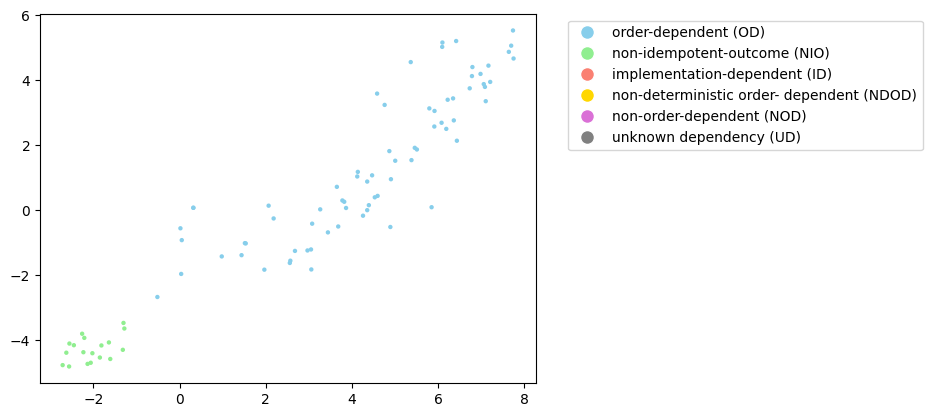

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed and post_train_label are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
labelsNums = post_train_label

# Define vibrant colors for each category (same as used in the bar plot)
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Ensure labels are within the range of colors [0, 1, 2, 3, 4]
# Filter out invalid labels (-1) and keep only valid labels [0, 1, 2, 3, 4]
valid_indices = [i for i, label in enumerate(labelsNums) if label in [0, 1]]
X_np_filtered = X_np[valid_indices]
labelsNums_filtered = [labelsNums[i] for i in valid_indices]

# Dimensionality reduction with t-SNE
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np_filtered)

# Scatter plot
for i, label in enumerate(labelsNums_filtered):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=colors[label], s=10, alpha=1, edgecolor='none', marker='o')

# Create legend with category labels
legend_labels = ['order-dependent (OD)', 'non-idempotent-outcome (NIO)', 'implementation-dependent (ID)', 'non-deterministic order- dependent (NDOD)', 'non-order-dependent (NOD)', 'unknown dependency (UD)']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors], labels=legend_labels,bbox_to_anchor=(1.05, 1), 
                    loc='upper left')

plt.show()


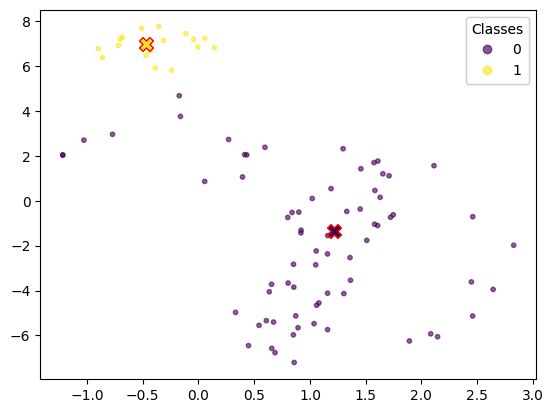

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

# Assuming post_train_embed, post_train_label, and labelsNums are defined
X = torch.stack(post_train_embed).cpu()
X_np = X.numpy()
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_np)

# Plot the data points
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labelsNums[:len(X_embedded)], s=10, cmap='viridis', alpha=0.6)

# Calculate class representatives
representatives = get_class_rep(post_train_embed, post_train_label)  # Make sure this function returns what you expect

# Get unique labels and their colors from the scatter plot
unique_labels = np.unique(labelsNums[:len(X_embedded)])
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# For each class representative, find the closest point and plot it
for i, rep in enumerate(representatives):
    if rep is not None:
        # Find the closest data point in the original space to this representative
        distances = np.linalg.norm(X_np - rep, axis=1)
        closest_point_index = np.argmin(distances)
        # Use the label of the closest data point to get the correct color
        label_of_closest = labelsNums[closest_point_index]
        color = scatter.cmap(scatter.norm(label_of_closest))
        plt.scatter(X_embedded[closest_point_index, 0], X_embedded[closest_point_index, 1], color=color, edgecolors='red', s=100, marker='X')

# You might want to adjust the legend to make sure it correctly represents your data
# plt.legend()
plt.show()


In [32]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Assuming 'X_embedded' is your t-SNE result and 'labelsNums' are your labels

# # Silhouette Score:
# # - Measures how similar an object is to its own cluster compared to other clusters.
# # - Range: -1 (incorrect clustering) to 1 (highly dense clustering). 
# #   A score close to 1 means that the clusters are well separated and clearly defined.
# silhouette_avg = silhouette_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Silhouette Score: {silhouette_avg}")

# # Davies-Bouldin Index:
# # - Evaluates the clustering quality by measuring the average 'similarity' between each cluster 
# #   and its most similar one. The similarity is based on a ratio of within-cluster distances to between-cluster distances.
# # - Range: 0 to +∞. Lower scores indicate better clustering quality.
# davies_bouldin = davies_bouldin_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Davies-Bouldin Index: {davies_bouldin}")

# # Calinski-Harabasz Index:
# # - Measures the cluster validity based on the ratio between the within-cluster dispersion and the between-cluster dispersion.
# # - Range: Higher values indicate better clustering quality, with no upper limit. Low values indicate clusters with high overlap.
# calinski_harabasz = calinski_harabasz_score(X_embedded, labelsNums[:len(X_embedded)])
# print(f"Calinski-Harabasz Index: {calinski_harabasz}")


In [33]:
from sklearn.metrics import f1_score
 # Create reverse mapping

count = 0

# Assuming val_dataset is iterable and has 'anchor' and 'label' keys
predicted_labels = []
true_labels = []

for item in val_dataset:
    count += 1
    input_vector = item['anchor']  # Your input vector for prediction
    
    # Get predicted cluster/label
    predicted_label_str = predict(input_vector)
    
    # Ensure predicted_label is in the valid range
    if predicted_label_str in label_to_int:
        predicted_label = label_to_int[predicted_label_str]
        predicted_labels.append(predicted_label)
    else:
        print(f"Warning: Encountered unknown predicted label {predicted_label_str}")
        continue

    # True label
    true_label_int = int(item['label'])  # Assuming 'label' contains the true label as integer
    if true_label_int in int_to_label:
        true_labels.append(true_label_int)
    else:
        print(f"Warning: Encountered unknown true label {true_label_int}")
        continue

    print(count, "Predicted:", predicted_label, "True:", true_label_int)

# Filter out any invalid entries where predicted or true labels are missing
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label and predicted_labels[i] in int_to_label]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

print("Loop completed")

# Calculate F1 Score, ignoring unknown labels
f1 = f1_score(filtered_true_labels, filtered_predicted_labels, average='weighted', zero_division=0)  # Adjust 'average' as necessary
print(f"F1 Score: {f1}")


1 Predicted: 0 True: 0
2 Predicted: 0 True: 0
3 Predicted: 0 True: 0
4 Predicted: 0 True: 0
5 Predicted: 0 True: 0
6 Predicted: 0 True: 0
7 Predicted: 1 True: 1
8 Predicted: 0 True: 0
9 Predicted: 1 True: 1
10 Predicted: 0 True: 0
11 Predicted: 0 True: 0
12 Predicted: 0 True: 0
13 Predicted: 1 True: 1
14 Predicted: 1 True: 0
15 Predicted: 0 True: 0
16 Predicted: 0 True: 0
17 Predicted: 0 True: 0
18 Predicted: 0 True: 0
19 Predicted: 0 True: 0
20 Predicted: 0 True: 0
21 Predicted: 1 True: 1
22 Predicted: 0 True: 0
23 Predicted: 1 True: 1
Loop completed
F1 Score: 0.9578769057029924


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.83      1.00      0.91         5

    accuracy                           0.96        23
   macro avg       0.92      0.97      0.94        23
weighted avg       0.96      0.96      0.96        23


 - Accuracy :  0.96
 - Precision :  0.96
 - Recall :  0.96
 - F1 score :  0.96
 - MCC :  0.89
 - AUC :  0.97


Performances by categories



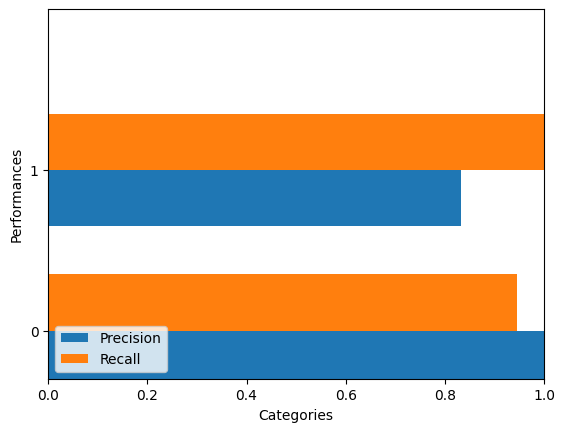



Confusion Matrix 


<AxesSubplot:>

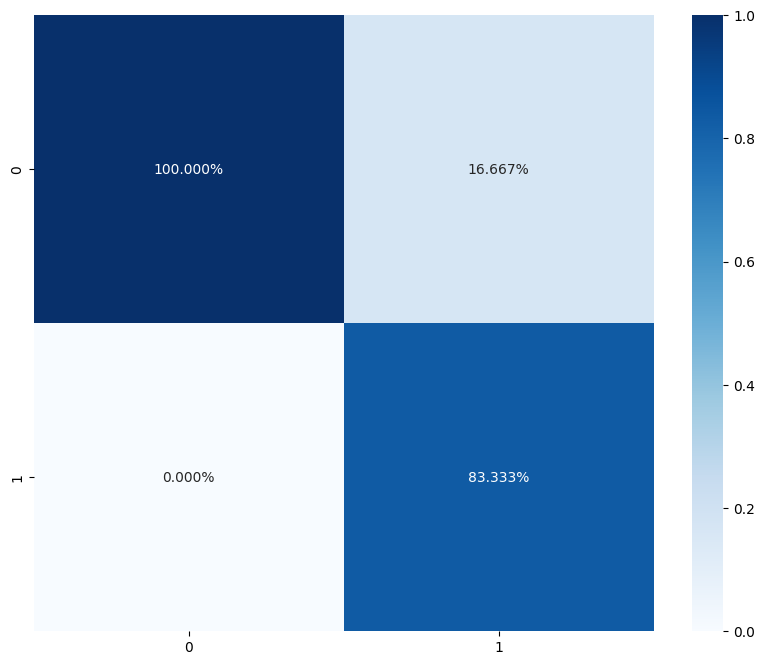

In [34]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

%matplotlib inline
warnings.filterwarnings("ignore")

def multiclass_roc_auc_score(truth, pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(truth)
    truth = lb.transform(truth)
    pred = lb.transform(pred)
    return roc_auc_score(truth, pred, average=average)

# Assuming predicted_labels and true_labels are already defined
predicted = predicted_labels
labels = true_labels

# Filter out 'unknown' labels
valid_indices = [i for i, label in enumerate(labels) if label != 'unknown']
filtered_labels = [labels[i] for i in valid_indices]
filtered_predicted = [predicted[i] for i in valid_indices]

unique_labels = list(set(filtered_labels))
print(classification_report(filtered_labels, filtered_predicted))

print('\n - Accuracy : ', np.round(metrics.accuracy_score(filtered_labels, filtered_predicted), 2))
print(' - Precision : ', np.round(metrics.precision_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - Recall : ', np.round(metrics.recall_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - F1 score : ', np.round(metrics.f1_score(filtered_labels, filtered_predicted, average='weighted'), 2))
print(' - MCC : ', np.round(metrics.matthews_corrcoef(filtered_labels, filtered_predicted), 2))
print(' - AUC : ', np.round(multiclass_roc_auc_score(filtered_labels, filtered_predicted), 2))

print("\n\nPerformances by categories\n")

ind = np.arange(len(unique_labels)) 
width = 0.35
fig, ax = plt.subplots()
precision = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[0]
recall = metrics.precision_recall_fscore_support(filtered_labels, filtered_predicted, labels=unique_labels)[1]
ax.barh(ind - width/2, precision, width, label='Precision')
ax.barh(ind + width/2, recall, width, label='Recall')
ax.set(yticks=ind, yticklabels=np.array(unique_labels), ylim=[2*width - 1, len(ind)])
plt.xlim(0, 1)
ax.legend(loc='lower left')
ax.set_ylabel("Performances")
ax.set_xlabel("Categories")
plt.show()

print("\n\nConfusion Matrix ")

mat = confusion_matrix(filtered_labels, filtered_predicted, labels=unique_labels)
df_cm = pd.DataFrame(mat, index=[i for i in unique_labels], columns=[i for i in unique_labels])
plt.figure(figsize=(10, 8))
sn.heatmap(df_cm / np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')


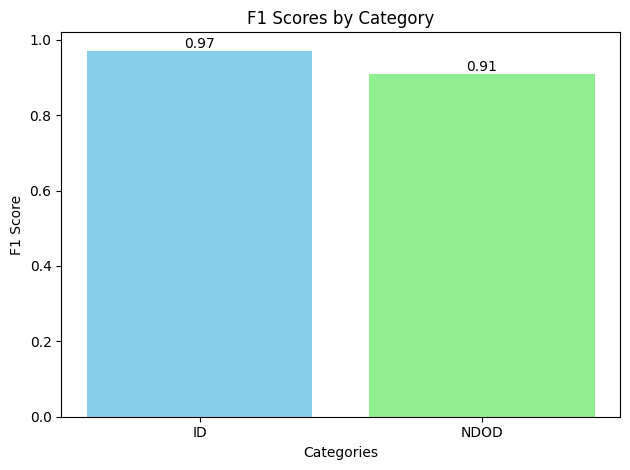

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
shortened_labels = {
    'OD': 'OD',
    'NIO': 'NIO',
    'ID': 'ID',
    'NDOD': 'NDOD',
    'NOD': 'NOD',
    'UD': 'UD'
}
# Assuming you have the predicted and true labels as per your previous code
# predicted_labels and true_labels should be lists of labels
# Filter out invalid labels from both true and predicted labels
valid_indices = [i for i in range(len(true_labels)) if true_labels[i] in int_to_label.keys() and predicted_labels[i] in int_to_label.keys()]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

# Calculate F1 scores for each category
f1_scores = []
categories = list(int_to_label.keys())
for category in categories:
    true_bin = [1 if label == category else 0 for label in filtered_true_labels]
    pred_bin = [1 if label == category else 0 for label in filtered_predicted_labels]
    f1 = f1_score(true_bin, pred_bin, zero_division=0)
    f1_scores.append(f1)

# Define vibrant colors for each category
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'grey']

# Create bar plot with shortened category names and vibrant colors
shortened_categories = [shortened_labels[int_to_label[category]] for category in categories]
fig, ax = plt.subplots()
bars = ax.bar(shortened_categories, f1_scores, color=colors)

# Add F1 scores on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  
                textcoords="offset points", ha='center', va='bottom')

# Customize the plot
ax.set_xlabel('Categories')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Category')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [36]:
# file_path = 'test_data_predictions.csv'

# # Load the compressed CSV file into a DataFrame
# df = pd.read_csv(file_path)

# # Extract the 'TrueLabel' and 'PredictedLabel' columns into separate variables
# labels_flaky = df['TrueLabel'].tolist()
# predicted_flaky = df['PredictedLabel'].tolist()

# print (classification_report(labels, predicted))

# print('\n - Accuracy : ' , np.round( metrics.accuracy_score(labels_flaky,  predicted_flaky) , 2))
# print(' - Precision : ' , np.round( metrics.precision_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - Recall : ' , np.round( metrics.recall_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - F1 score : ' , np.round( metrics.f1_score(labels_flaky,  predicted_flaky , average='weighted') , 2))
# print(' - MCC : ' , np.round( metrics.matthews_corrcoef(labels_flaky,  predicted_flaky) , 2))
# print(' - AUC : ' , np.round( multiclass_roc_auc_score(labels_flaky,  predicted_flaky),2) )

# print("\n\nPerfomnaces by categories\n")


# ind = np.arange(len(unique_labels)) 
# width = 0.35
# fig, ax = plt.subplots()
# precision = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[0]
# recall = metrics.precision_recall_fscore_support(labels_flaky,  predicted_flaky ,  labels=unique_labels )[1]
# ax.barh(ind - width/2, precision, width, label='Precision')
# ax.barh(ind + width/2, recall, width, label='Recall')
# ax.set(yticks=ind + width, yticklabels=np.array(unique_labels),
# ylim=[2*width - 1, len(ind)])
# plt.xlim(0,1)
# ax.legend(loc='upper right')
# ax.set_xlabel("Performances")
# ax.set_ylabel("Categories")
# plt.show()

# print("\n\nConfusion Matrix ")

# mat = confusion_matrix(labels_flaky,  predicted_flaky, labels=unique_labels)
# df_cm = pd.DataFrame(mat, index = [i for i in unique_labels], columns = [i for i in unique_labels])
# plt.figure(figsize = (10,8))
# sn.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.3%', cmap='Blues')

In [37]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import metrics

# precision_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[0]
# recall_our_model = metrics.precision_recall_fscore_support(labels, predicted, labels=unique_labels)[1]
# # And assuming 'unique_labels' is defined as before

# ind = np.arange(len(unique_labels))  # the x locations for the groups
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the figure size as needed

# # Using a set of contrasting, darker colors
# colors = ['blue', 'green', 'red', 'orange']

# # Plotting Precision and Recall for Your Model
# rects1 = ax.bar(ind - width*1.5, precision_our_model, width, label='Our Precision', color=colors[0])
# rects2 = ax.bar(ind - width/2, recall_our_model, width, label='Our Recall', color=colors[1])

# # Plotting Precision and Recall for Flaky Model
# rects3 = ax.bar(ind + width/2, precision_flaky, width, label='FlakyCat Precision', color=colors[2])
# rects4 = ax.bar(ind + width*1.5, recall_flaky, width, label='FlakyCat Recall', color=colors[3])

# # Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Class-wise Precision and Recall for Our Model vs. FlakyCat Model')
# ax.set_xticks(ind)
# ax.set_xticklabels(unique_labels, rotation=45, ha="right")  # Rotate for better label visibility
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside the figure

# # Optional: Adding scores above bars
# ax.bar_label(rects1, padding=3, fmt='%.2f')
# ax.bar_label(rects2, padding=3, fmt='%.2f')
# ax.bar_label(rects3, padding=3, fmt='%.2f')
# ax.bar_label(rects4, padding=3, fmt='%.2f')

# fig.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend outside

# plt.show()


In [38]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming metrics have been calculated and stored in variables for both models.
# # Example metric variables: accuracy, precision, recall, f1_score, mcc, auc for the original model
# # And similarly named variables with a '_flaky' suffix for the comparison model.

# metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC']
# your_model_metrics = [
#     np.round(metrics.accuracy_score(labels, predicted), 2),
#     np.round(metrics.precision_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.recall_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.f1_score(labels, predicted, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels, predicted), 2),
#     np.round(multiclass_roc_auc_score(labels, predicted), 2)
# ]

# flaky_model_metrics = [
#     np.round(metrics.accuracy_score(labels_flaky, predicted_flaky), 2),
#     np.round(metrics.precision_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.recall_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.f1_score(labels_flaky, predicted_flaky, average='weighted'), 2),
#     np.round(metrics.matthews_corrcoef(labels_flaky, predicted_flaky), 2),
#     np.round(multiclass_roc_auc_score(labels_flaky, predicted_flaky), 2)
# ]

# x = np.arange(len(metrics_labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, your_model_metrics, width, label='Our Model')
# rects2 = ax.bar(x + width/2, flaky_model_metrics, width, label='FlakyCat Model')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Metrics Comparison between Our Model and FlakyCat Model')
# ax.set_xticks(x)
# ax.set_xticklabels(metrics_labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()


In [39]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# def extract_projections(siamese_network, dataloader):
#     projections = []
#     labels = []
#     for batch in dataloader:
#         label = batch["label"]
#         anchor = batch["anchor"]
#         projection = siamese_network(anchor)
        
#         projections.append(projection.cpu().detach().numpy())
#         labels.append(label.numpy())
#     projections = np.vstack(projections)
#     labels = np.hstack(labels)
#     return projections, labels

In [40]:
# projections, labels = extract_projections(siamese_network, train_dataloader)
# val_projections, val_labels = extract_projections(siamese_network, val_dataloader)

In [41]:
# print(len(projections), len(train_dataloader))

In [42]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(projections, labels)

# # Train SVM Classifier
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(projections, labels)

In [43]:
# # Evaluate Random Forest Classifier
# rf_predictions = rf_classifier.predict(val_projections)
# rf_accuracy = accuracy_score(val_labels, rf_predictions)
# rf_f1 = f1_score(val_labels, rf_predictions, average='weighted')
# print(f"Random Forest Classifier Accuracy: {rf_accuracy}, F1: {rf_f1}")

# # Evaluate SVM Classifier
# svm_predictions = svm_classifier.predict(val_projections)
# svm_accuracy = accuracy_score(val_labels, svm_predictions)
# svm_f1 = f1_score(val_labels, svm_predictions, average='weighted')
# print(f"SVM Classifier Accuracy: {svm_accuracy}, F1:{svm_f1}")